In [2]:
import pandas as pd
import pandas as pd
import cv2
from skimage.transform import resize
import numpy as np
import os
from scipy import ndimage, misc
from skimage import color
from skimage import io
from os import listdir
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import models
from keras import layers
from keras import optimizers

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/train.csv')

In [4]:
df.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [ ]:
all_image=[]
count=0
for index in range(df.shape[0]):
    id=df.loc[index,'Id']
    path='/content/drive/MyDrive/train/'+str(id)+'.jpg'
    im_array=cv2.imread(path)
    im_array=resize(im_array,(256,256),anti_aliasing=True)
    all_image.append(im_array)
    
    count+=1
    progress=(count/len(df['Id']))*100
    print('progress =',round(progress,2), '%',end='\r')

In [5]:
import pickle

with open ('/content/images', 'rb') as fp:
    all_image = pickle.load(fp)

In [24]:
all_image = all_image[:len(all_image)-6]

In [6]:
all_image[1]

array([[[0.58615196, 0.55870098, 0.57046569],
        [0.56078431, 0.53333333, 0.54509804],
        [0.54509804, 0.51764706, 0.52941176],
        ...,
        [0.62352941, 0.68440564, 0.74580365],
        [0.64004959, 0.70279469, 0.76835172],
        [0.62278167, 0.68552677, 0.76678922]],

       [[0.58823529, 0.56078431, 0.57254902],
        [0.57022059, 0.54276961, 0.55586225],
        [0.55686275, 0.52941176, 0.54194527],
        ...,
        [0.60952819, 0.68872836, 0.74901961],
        [0.62749215, 0.70523897, 0.76798407],
        [0.62098652, 0.69604779, 0.77447917]],

       [[0.57797181, 0.55294118, 0.57104779],
        [0.56923732, 0.54509804, 0.56176758],
        [0.55919596, 0.53174498, 0.54509804],
        ...,
        [0.58581495, 0.67601103, 0.74117647],
        [0.58581495, 0.67833946, 0.74206782],
        [0.57104779, 0.66596297, 0.73333333]],

       ...,

       [[0.11973039, 0.18397672, 0.33020929],
        [0.12941176, 0.19607843, 0.34117647],
        [0.10330882, 0

In [25]:
grayscaled = []

for image in all_image:
  image = color.rgb2gray(image)
  grayscaled.append(image)


In [26]:
len(grayscaled)

9912

In [27]:
grayscaled[0][0]

array([0.63447441, 0.62953162, 0.63835072, 0.64172327, 0.65187526,
       0.67093919, 0.6752877 , 0.68869778, 0.69735168, 0.70307882,
       0.7064737 , 0.71767007, 0.71951289, 0.72811939, 0.73034823,
       0.72812226, 0.73311709, 0.73610713, 0.74320127, 0.74525616,
       0.74106382, 0.73743878, 0.74001907, 0.74176732, 0.75105257,
       0.74643335, 0.72661496, 0.73110333, 0.73650372, 0.74270496,
       0.73488719, 0.74610713, 0.74797636, 0.73991462, 0.73722609,
       0.73730702, 0.73063428, 0.74213836, 0.75259481, 0.73786109,
       0.73507949, 0.74102801, 0.74138643, 0.73677402, 0.72674835,
       0.72207261, 0.71648359, 0.70133923, 0.703146  , 0.70292732,
       0.70309636, 0.71182111, 0.7110463 , 0.7106173 , 0.71367926,
       0.70874041, 0.70182146, 0.70752938, 0.7156806 , 0.70067203,
       0.68542085, 0.67591067, 0.68793   , 0.68816928])

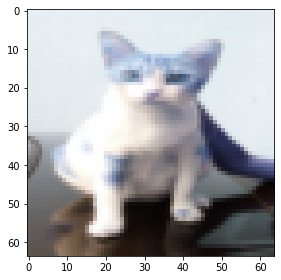

In [28]:
io.imshow(all_image[800])

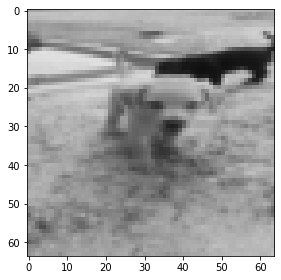

In [29]:
io.imshow(grayscaled[0])

In [30]:
type(grayscaled)

list

In [31]:
blurred = []
for image in grayscaled:
    
      image = ndimage.gaussian_filter(image, sigma= 1)
      blurred.append(image)

In [32]:
blurred[0][0][0]

0.671519855536712

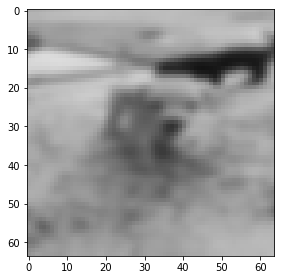

In [33]:
io.imshow(blurred[0])

In [34]:
type(all_image)

list

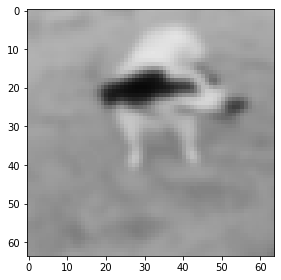

In [35]:
io.imshow(image)

In [36]:
flipped_horizontal = []
for image in blurred:
    
      image1 = cv2.flip(image,0)
      
      flipped_horizontal.append(image1)

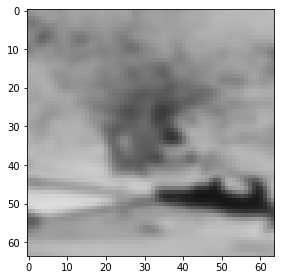

In [37]:
io.imshow(flipped_horizontal[0])

In [38]:
flipped_vertical = []
for image in blurred:
    
      image2 = cv2.flip(image,1)
      
      flipped_vertical.append(image2)


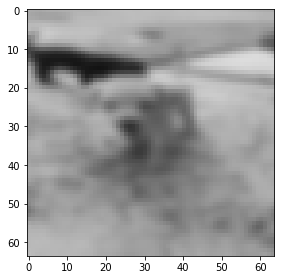

In [39]:
io.imshow(flipped_vertical[0])

In [40]:
y = df['Pawpularity']

In [41]:
X_grayscaled = (np.array(grayscaled))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_grayscaled, y, random_state=42)

In [43]:
ann = tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='relu')
      ])

ann.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
233/233 [==============================] - 25s 103ms/step - loss: 552.7825 - root_mean_squared_error: 23.5113
Epoch 2/5
233/233 [==============================] - 24s 103ms/step - loss: 482.8612 - root_mean_squared_error: 21.9741
Epoch 3/5
233/233 [==============================] - 24s 105ms/step - loss: 474.2497 - root_mean_squared_error: 21.7773
Epoch 4/5
233/233 [==============================] - 24s 103ms/step - loss: 468.2529 - root_mean_squared_error: 21.6391
Epoch 5/5
233/233 [==============================] - 24s 104ms/step - loss: 455.9622 - root_mean_squared_error: 21.3533


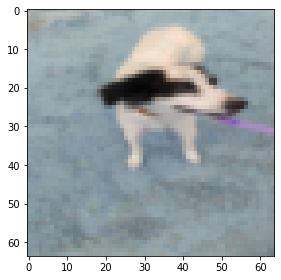

In [44]:
io.imshow(all_image[-1])

In [45]:
X_blurred = (np.array(blurred))

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_blurred, y, random_state=42)

In [47]:
ann = tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='relu')
      ])

ann.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
233/233 [==============================] - 23s 95ms/step - loss: 648.9331 - root_mean_squared_error: 25.4742
Epoch 2/5
233/233 [==============================] - 22s 94ms/step - loss: 620.7231 - root_mean_squared_error: 24.9143
Epoch 3/5
233/233 [==============================] - 22s 93ms/step - loss: 617.4868 - root_mean_squared_error: 24.8493
Epoch 4/5
233/233 [==============================] - 23s 98ms/step - loss: 611.0798 - root_mean_squared_error: 24.7200
Epoch 5/5
233/233 [==============================] - 23s 100ms/step - loss: 602.7205 - root_mean_squared_error: 24.5504


In [48]:
X_flipped_horizontal = (np.array(flipped_horizontal))

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_flipped_horizontal , y, random_state=42)

In [50]:
ann = tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='relu')
      ])

ann.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
233/233 [==============================] - 23s 94ms/step - loss: 648.2887 - root_mean_squared_error: 25.4615
Epoch 2/5
233/233 [==============================] - 22s 94ms/step - loss: 615.4774 - root_mean_squared_error: 24.8088
Epoch 3/5
233/233 [==============================] - 22s 95ms/step - loss: 608.8359 - root_mean_squared_error: 24.6746
Epoch 4/5
233/233 [==============================] - 22s 93ms/step - loss: 607.0966 - root_mean_squared_error: 24.6393
Epoch 5/5
233/233 [==============================] - 22s 94ms/step - loss: 518.3639 - root_mean_squared_error: 22.7676


In [51]:
X_flipped_vertical = (np.array(flipped_vertical))

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_flipped_vertical, y, random_state=42)

In [53]:
ann = tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='relu')
      ])

ann.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
233/233 [==============================] - 26s 108ms/step - loss: 665.1384 - root_mean_squared_error: 25.7903
Epoch 2/5
233/233 [==============================] - 22s 94ms/step - loss: 617.7084 - root_mean_squared_error: 24.8538
Epoch 3/5
233/233 [==============================] - 22s 96ms/step - loss: 607.5427 - root_mean_squared_error: 24.6484
Epoch 4/5
233/233 [==============================] - 22s 94ms/step - loss: 607.3596 - root_mean_squared_error: 24.6447
Epoch 5/5
233/233 [==============================] - 22s 94ms/step - loss: 607.3506 - root_mean_squared_error: 24.6445
